In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
train_df = pd.read_excel('Data_train.xlsx')
test_df = pd.read_excel('Test_set.xlsx')

In [3]:
big_df = train_df.append(test_df)

C:\Users\home\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [4]:
big_df.dtypes

Additional_Info     object
Airline             object
Arrival_Time        object
Date_of_Journey     object
Dep_Time            object
Destination         object
Duration            object
Price              float64
Route               object
Source              object
Total_Stops         object
dtype: object

In [5]:
big_df.shape

(13354, 11)

In [6]:
big_df['Date'] = big_df['Date_of_Journey'].str.split('/').str[0]
big_df['Month'] = big_df['Date_of_Journey'].str.split('/').str[1]
big_df['Year'] = big_df['Date_of_Journey'].str.split('/').str[2]

In [7]:
big_df['Date'] = big_df['Date'].astype(int)
big_df['Month'] = big_df['Month'].astype(int)
big_df['Year'] = big_df['Year'].astype(int)

In [8]:
big_df = big_df.drop(['Date_of_Journey'],axis=1)

In [9]:
big_df.head()

,Additional_Info,Airline,Arrival_Time,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Date,Month,Year
0,No info,IndiGo,01:10 22 Mar,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,24,3,2019
1,No info,Air India,13:15,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,2019
2,No info,Jet Airways,04:25 10 Jun,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,2019
3,No info,IndiGo,23:30,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,12,5,2019
4,No info,IndiGo,21:35,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,1,3,2019


In [10]:
big_df['Total_Stops'] = big_df['Total_Stops'].fillna('1 stop')

In [11]:
big_df['Arrival_Time'] = big_df['Arrival_Time'].str.split(' ').str[0]

In [12]:
big_df.head()

,Additional_Info,Airline,Arrival_Time,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Date,Month,Year
0,No info,IndiGo,01:10,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,24,3,2019
1,No info,Air India,13:15,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,2019
2,No info,Jet Airways,04:25,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,2019
3,No info,IndiGo,23:30,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,12,5,2019
4,No info,IndiGo,21:35,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,1,3,2019


In [13]:
big_df['Total_Stops'] = big_df['Total_Stops'].replace('non-stop','0 stop')

In [14]:
big_df['stop'] = big_df['Total_Stops'].str.split(' ').str[0]

In [15]:
big_df['stop'] = big_df['stop'].astype(int)

In [16]:
big_df = big_df.drop(['Total_Stops'],axis=1)

In [17]:
big_df.head()

,Additional_Info,Airline,Arrival_Time,Dep_Time,Destination,Duration,Price,Route,Source,Date,Month,Year,stop
0,No info,IndiGo,01:10,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,24,3,2019,0
1,No info,Air India,13:15,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,1,5,2019,2
2,No info,Jet Airways,04:25,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,9,6,2019,2
3,No info,IndiGo,23:30,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,12,5,2019,1
4,No info,IndiGo,21:35,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1,3,2019,1


In [18]:
big_df['Arrival_Hour'] = big_df['Arrival_Time'].str.split(':').str[0]
big_df['Arrival_Minute'] = big_df['Arrival_Time'].str.split(':').str[1]

big_df['Arrival_Hour'] = big_df['Arrival_Hour'].astype(int)
big_df['Arrival_Minute'] = big_df['Arrival_Minute'].astype(int)

big_df = big_df.drop(['Arrival_Time'],axis=1)

In [19]:
big_df.head()

,Additional_Info,Airline,Dep_Time,Destination,Duration,Price,Route,Source,Date,Month,Year,stop,Arrival_Hour,Arrival_Minute
0,No info,IndiGo,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,24,3,2019,0,1,10
1,No info,Air India,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,1,5,2019,2,13,15
2,No info,Jet Airways,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,9,6,2019,2,4,25
3,No info,IndiGo,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,12,5,2019,1,23,30
4,No info,IndiGo,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1,3,2019,1,21,35


In [20]:
big_df['Dep_Hour'] = big_df['Dep_Time'].str.split(':').str[0]
big_df['Dep_Minute'] = big_df['Dep_Time'].str.split(':').str[1]

big_df['Dep_Hour'] = big_df['Dep_Hour'].astype(int)
big_df['Dep_Minute'] = big_df['Dep_Minute'].astype(int)

big_df = big_df.drop(['Dep_Time'],axis=1)

In [24]:
big_df['Route_0'] = big_df['Route'].str.split('→ ').str[0]
big_df['Route_1'] = big_df['Route'].str.split('→ ').str[1]
big_df['Route_2'] = big_df['Route'].str.split('→ ').str[2]
big_df['Route_3'] = big_df['Route'].str.split('→ ').str[3]
big_df['Route_4'] = big_df['Route'].str.split('→ ').str[4]

In [25]:
big_df.head()

,Additional_Info,Airline,Destination,Duration,Price,Route,Source,Date,Month,Year,stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_0,Route_1,Route_2,Route_3,Route_4
0,No info,IndiGo,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,No info,Air India,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,No info,Jet Airways,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,No info,IndiGo,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,No info,IndiGo,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [26]:
big_df['Price'].fillna((big_df['Price'].mean()),inplace=True)

In [27]:
big_df['Route_0'].fillna('None',inplace=True)
big_df['Route_1'].fillna('None',inplace=True)
big_df['Route_2'].fillna('None',inplace=True)
big_df['Route_3'].fillna('None',inplace=True)
big_df['Route_4'].fillna('None',inplace=True)

In [28]:
big_df.describe()

,Price,Date,Month,Year,stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
count,13354.000000,13354.000000,13354.000000,13354.0,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,9087.064121,13.389846,4.710574,2019.0,0.826045,13.396061,24.664146,12.513254,24.507264
std,4124.447805,8.439060,1.165622,0.0,0.674608,6.896145,16.559723,5.736273,18.832385
min,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6135.250000,6.000000,3.000000,2019.0,0.000000,8.000000,10.000000,8.000000,5.000000
50%,9087.064121,12.000000,5.000000,2019.0,1.000000,14.000000,25.000000,11.000000,25.000000
75%,11087.000000,21.000000,6.000000,2019.0,1.000000,19.000000,35.000000,18.000000,40.000000
max,79512.000000,27.000000,6.000000,2019.0,4.000000,23.000000,55.000000,23.000000,55.000000


In [29]:
big_df = big_df.drop(['Route'],axis=1)
big_df = big_df.drop(['Duration'],axis=1)

In [30]:
big_df.head()

,Additional_Info,Airline,Destination,Price,Source,Date,Month,Year,stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_0,Route_1,Route_2,Route_3,Route_4
0,No info,IndiGo,New Delhi,3897.0,Banglore,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,No info,Air India,Banglore,7662.0,Kolkata,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,No info,Jet Airways,Cochin,13882.0,Delhi,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,No info,IndiGo,Banglore,6218.0,Kolkata,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,No info,IndiGo,New Delhi,13302.0,Banglore,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [31]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
big_df['Additional_Info'] = enc.fit_transform(big_df['Additional_Info'])
big_df['Destination'] = enc.fit_transform(big_df['Destination'])
big_df['Airline'] = enc.fit_transform(big_df['Airline'])
big_df['Source'] = enc.fit_transform(big_df['Source'])
big_df['Route_0'] = enc.fit_transform(big_df['Route_0'])
big_df['Route_1'] = enc.fit_transform(big_df['Route_1'])
big_df['Route_2'] = enc.fit_transform(big_df['Route_2'])
big_df['Route_3'] = enc.fit_transform(big_df['Route_3'])
big_df['Route_4'] = enc.fit_transform(big_df['Route_4'])

In [32]:
big_df.shape

(13354, 18)

In [33]:
df_train = big_df[0:10638]
df_test = big_df[10638:]
df_test = df_test.drop(['Price'],axis=1)

In [34]:
X = df_train.drop(['Price'],axis=1)
y = df_train.Price

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=10000)

# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
predict = model.predict(X_test)

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y_test,predict)

0.5304335172392314

In [43]:
big_df.head()

,Additional_Info,Airline,Destination,Price,Source,Date,Month,Year,stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_0,Route_1,Route_2,Route_3,Route_4
0,8,3,5,3897.0,0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,8,1,0,7662.0,3,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,8,4,1,13882.0,2,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,8,3,0,6218.0,3,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,8,3,5,13302.0,0,1,3,2019,1,21,35,16,50,0,34,8,12,4


<IPython.core.display.Javascript object>


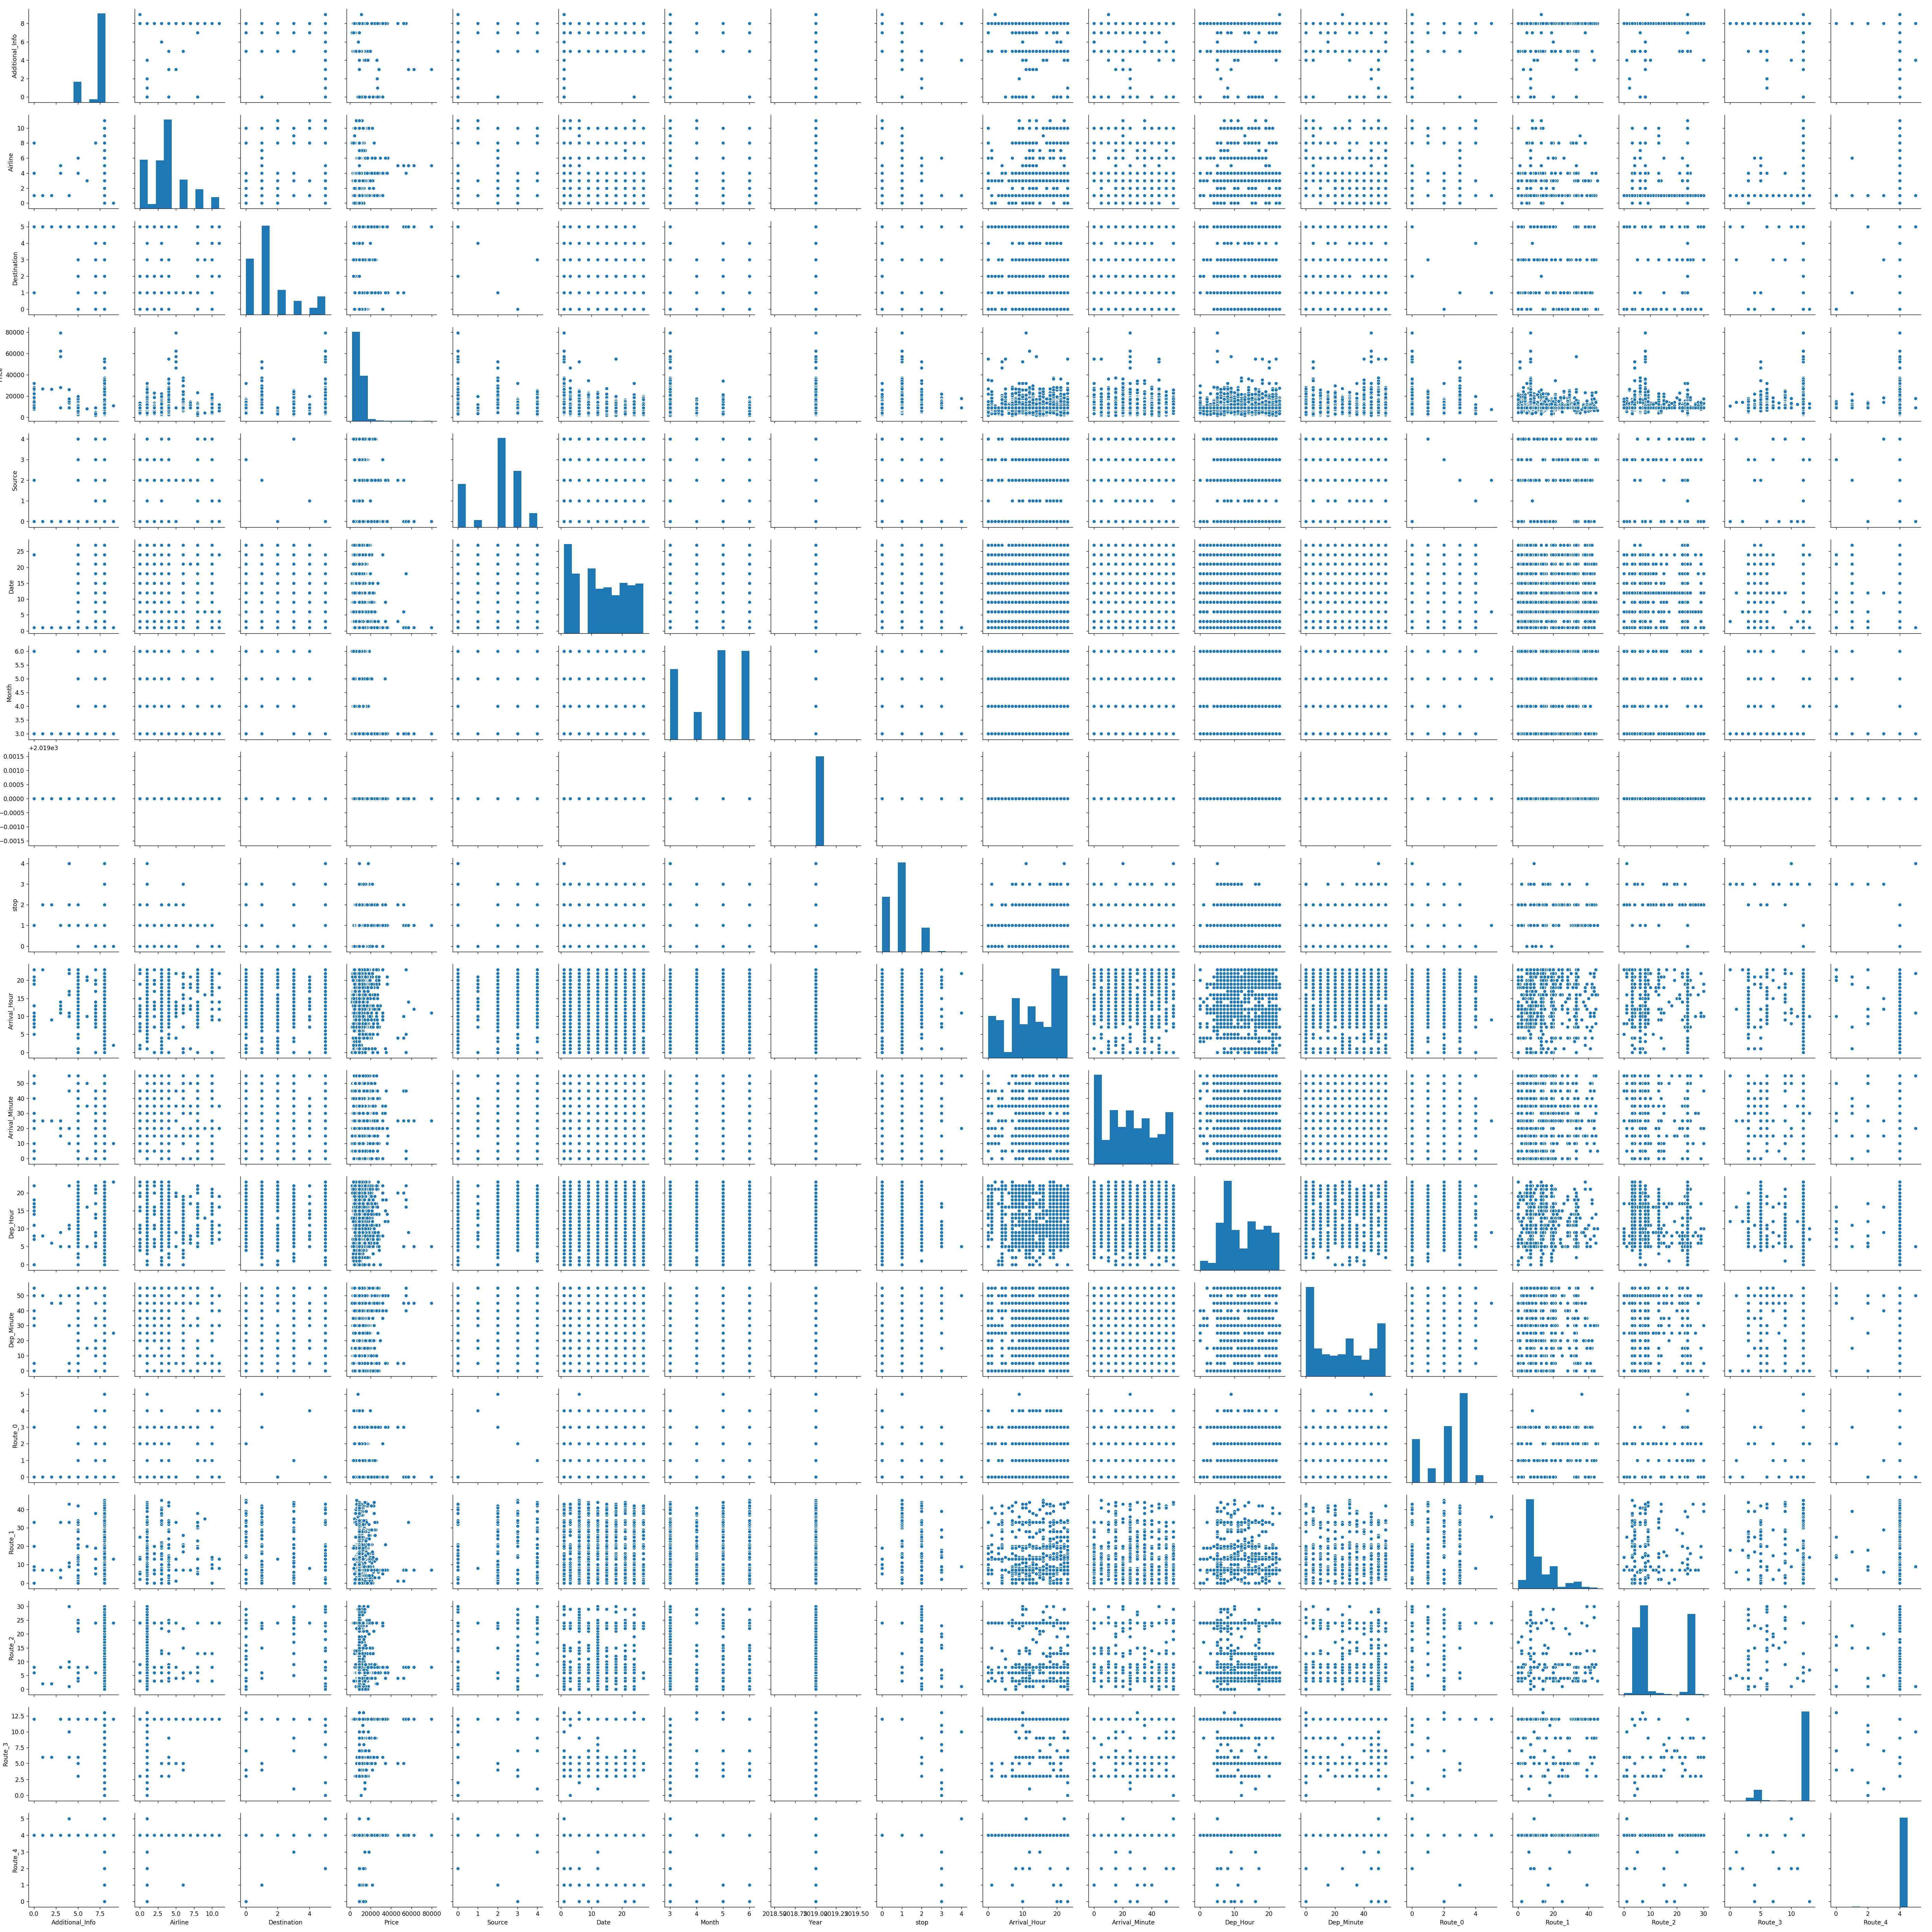

In [50]:
sns.pairplot(big_df)